In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (20, 6)

# Датасет

## Abalone

URL: https://archive.ics.uci.edu/dataset/1/abalone

Датасет предназначен для прогнозирования возраста абалонов по физическим измерениям.  Возраст абалона определяют, разрезая раковину по конусу, окрашивая ее и подсчитывая количество колец через микроскоп - скучная и трудоемкая задача. Для прогнозирования возраста используются другие измерения, которые легче получить.  Для решения задачи может потребоваться дополнительная информация, например, погодные условия и местоположение (следовательно, наличие пищи).

**Признаки**

1. Sex – пол (категориальный), M/F/I (младенец)
2. Length –  максимальная длина раковины (мм)
3. Diameter	– перпендикуляр к длине (мм)
4. Height –  ширина с мясом в оболочке (мм)
5. Whole weight – вес всей ракушки (грамм)
6. Shucked weight – вес внутренностей (грамм)
7. Viscera weight –  вес кишечника (грамм)
8. Shell weight – вес сухой ракушки (грамм)
9. **Rings** – таргет, количество колец (+1,5 дает возраст в годах)


## EDA


In [3]:
feature_names = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings"
]

In [4]:
raw_data = pd.read_csv('./data/abalone.data', header=None, names=feature_names)

In [5]:
raw_data.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
793,M,0.575,0.450,0.165,0.9215,0.3275,0.225,0.2560,12
3486,F,0.505,0.475,0.160,1.1155,0.5090,0.239,0.3065,8
1639,I,0.575,0.450,0.135,0.8070,0.3615,0.176,0.2540,10
677,F,0.500,0.375,0.115,0.5945,0.1850,0.148,0.1900,11
1865,I,0.520,0.380,0.115,0.6645,0.3285,0.170,0.1425,7


In [6]:
raw_data.shape

(4177, 9)

Все данные без пропусков

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
raw_data.isna().sum(axis=0)

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


### Распределения признаков

In [10]:
num_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
                'Viscera weight', 'Shell weight']

<Axes: xlabel='Sex', ylabel='count'>

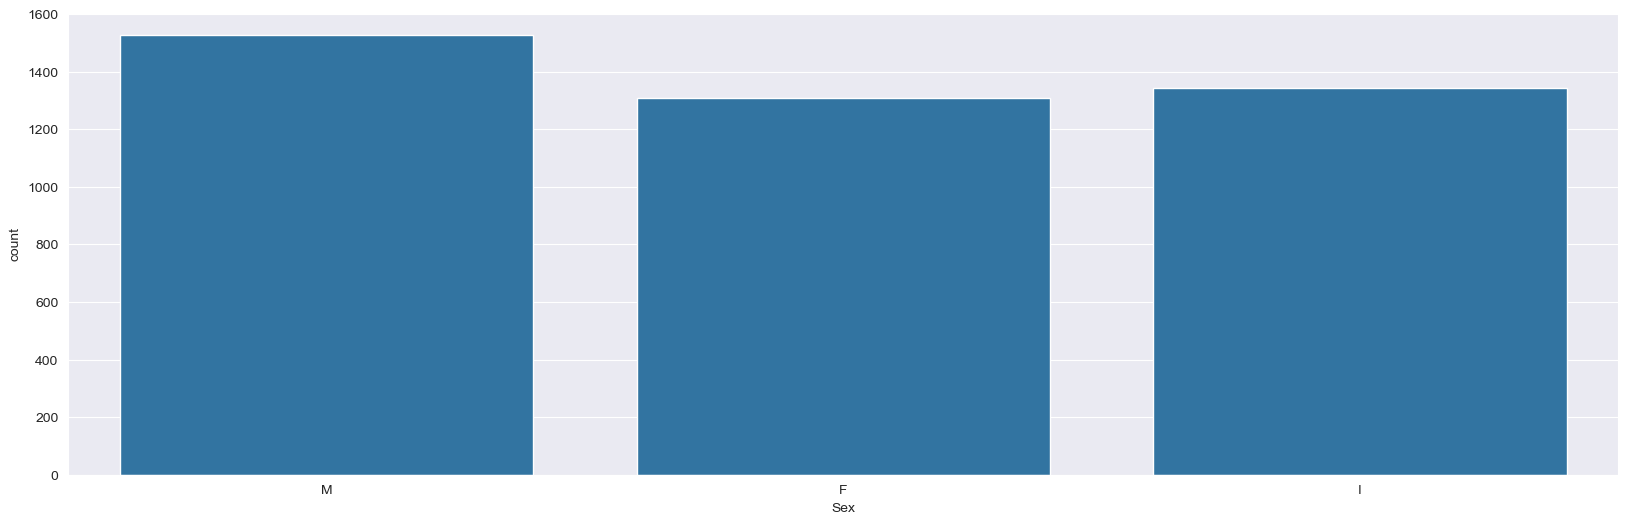

In [11]:
sns.countplot(raw_data, x='Sex')

In [12]:
raw_data.Sex.value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

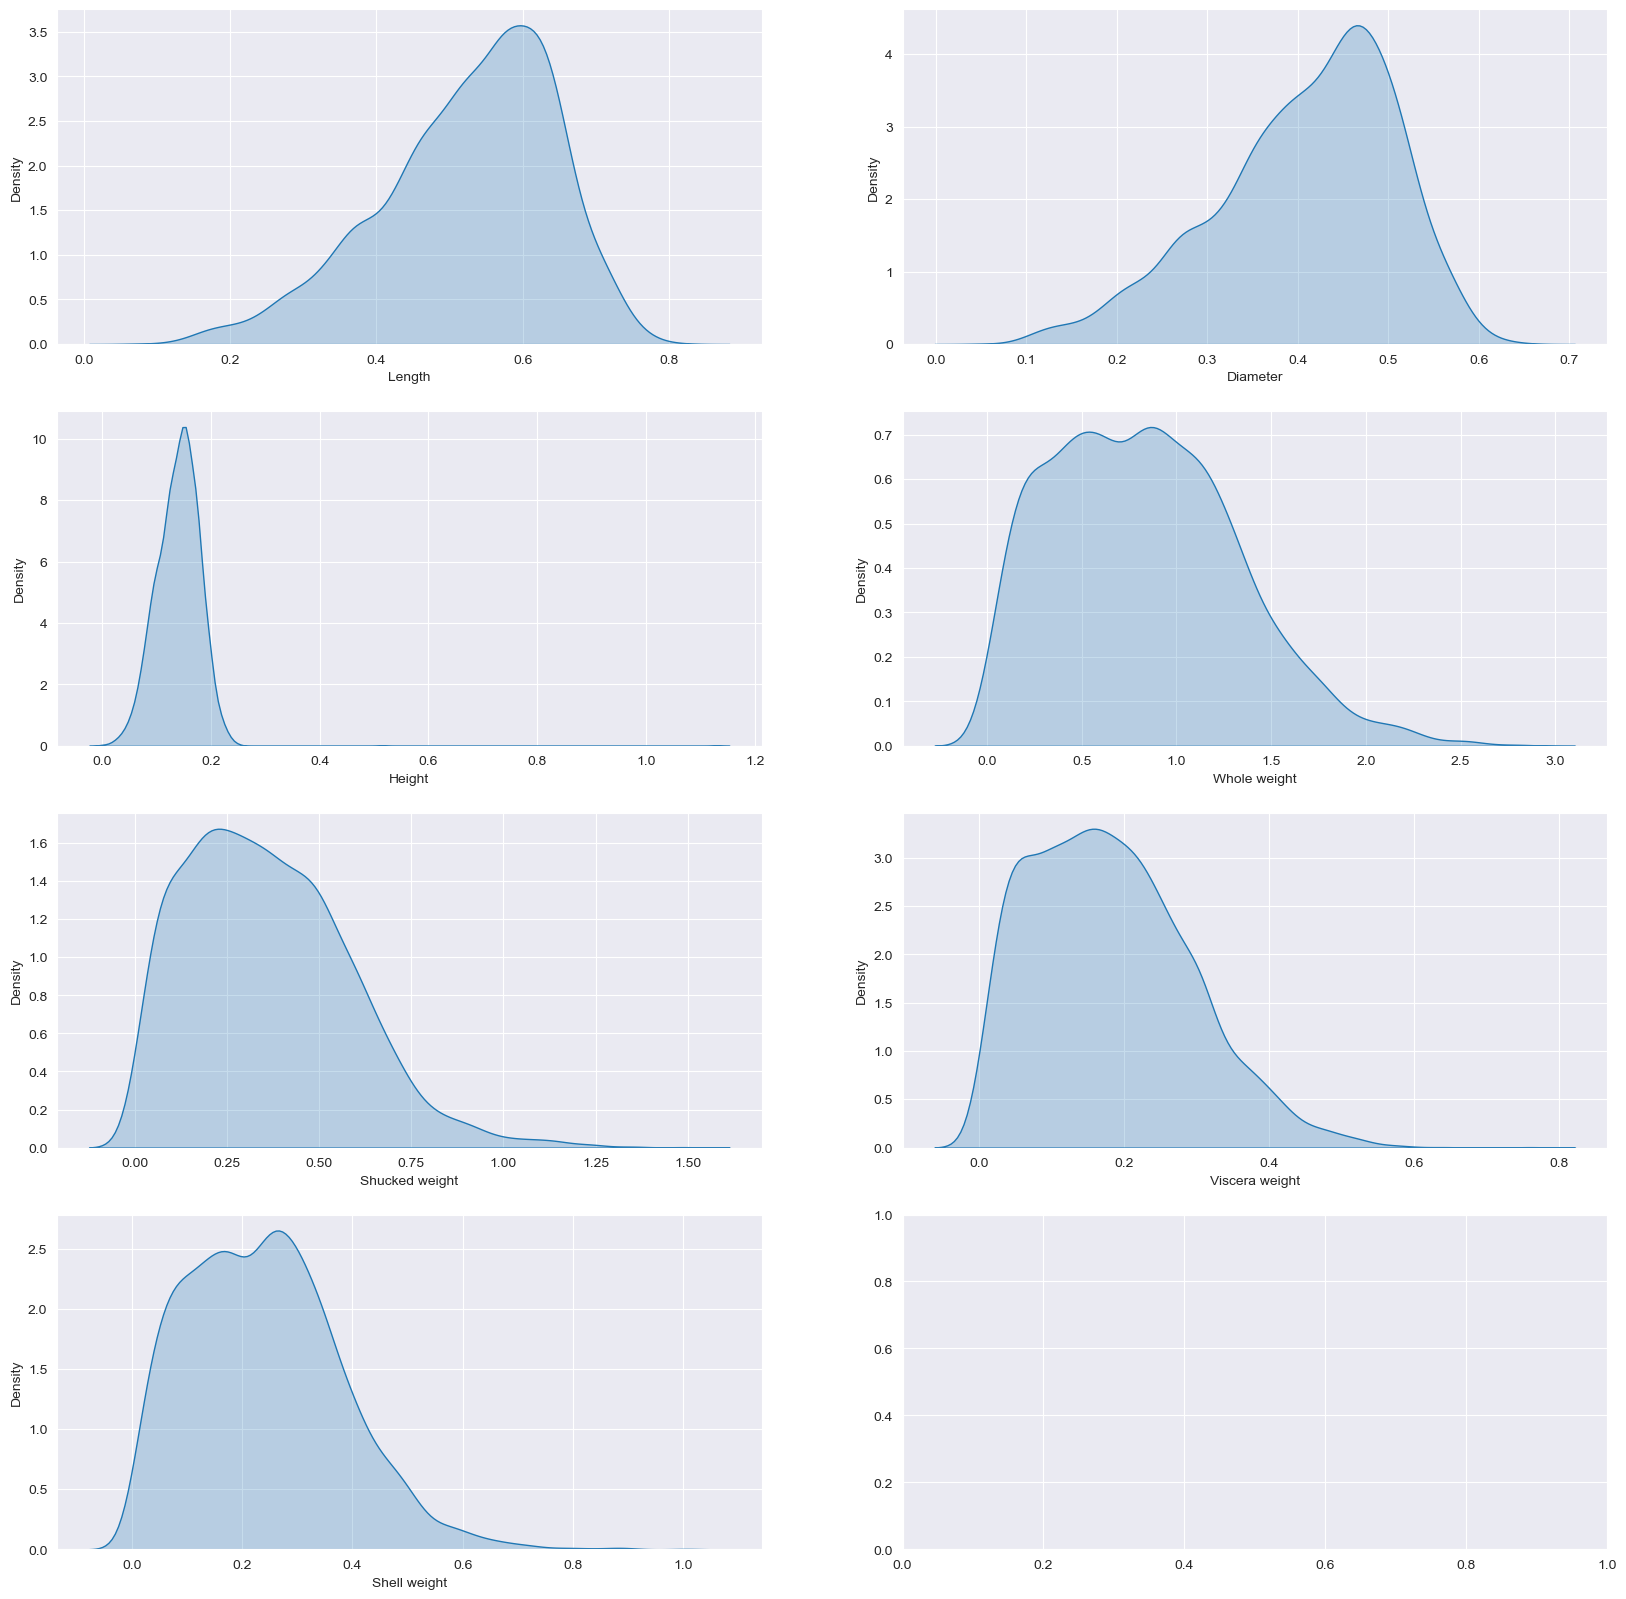

In [13]:
f, ax = plt.subplots(4, 2, figsize=(20, 20))

i = j = 0
for column in num_features:
    if j == 2:
        j = 0
        i += 1

    sns.kdeplot(raw_data, x=column, fill=True, ax=ax[i, j])

    j += 1

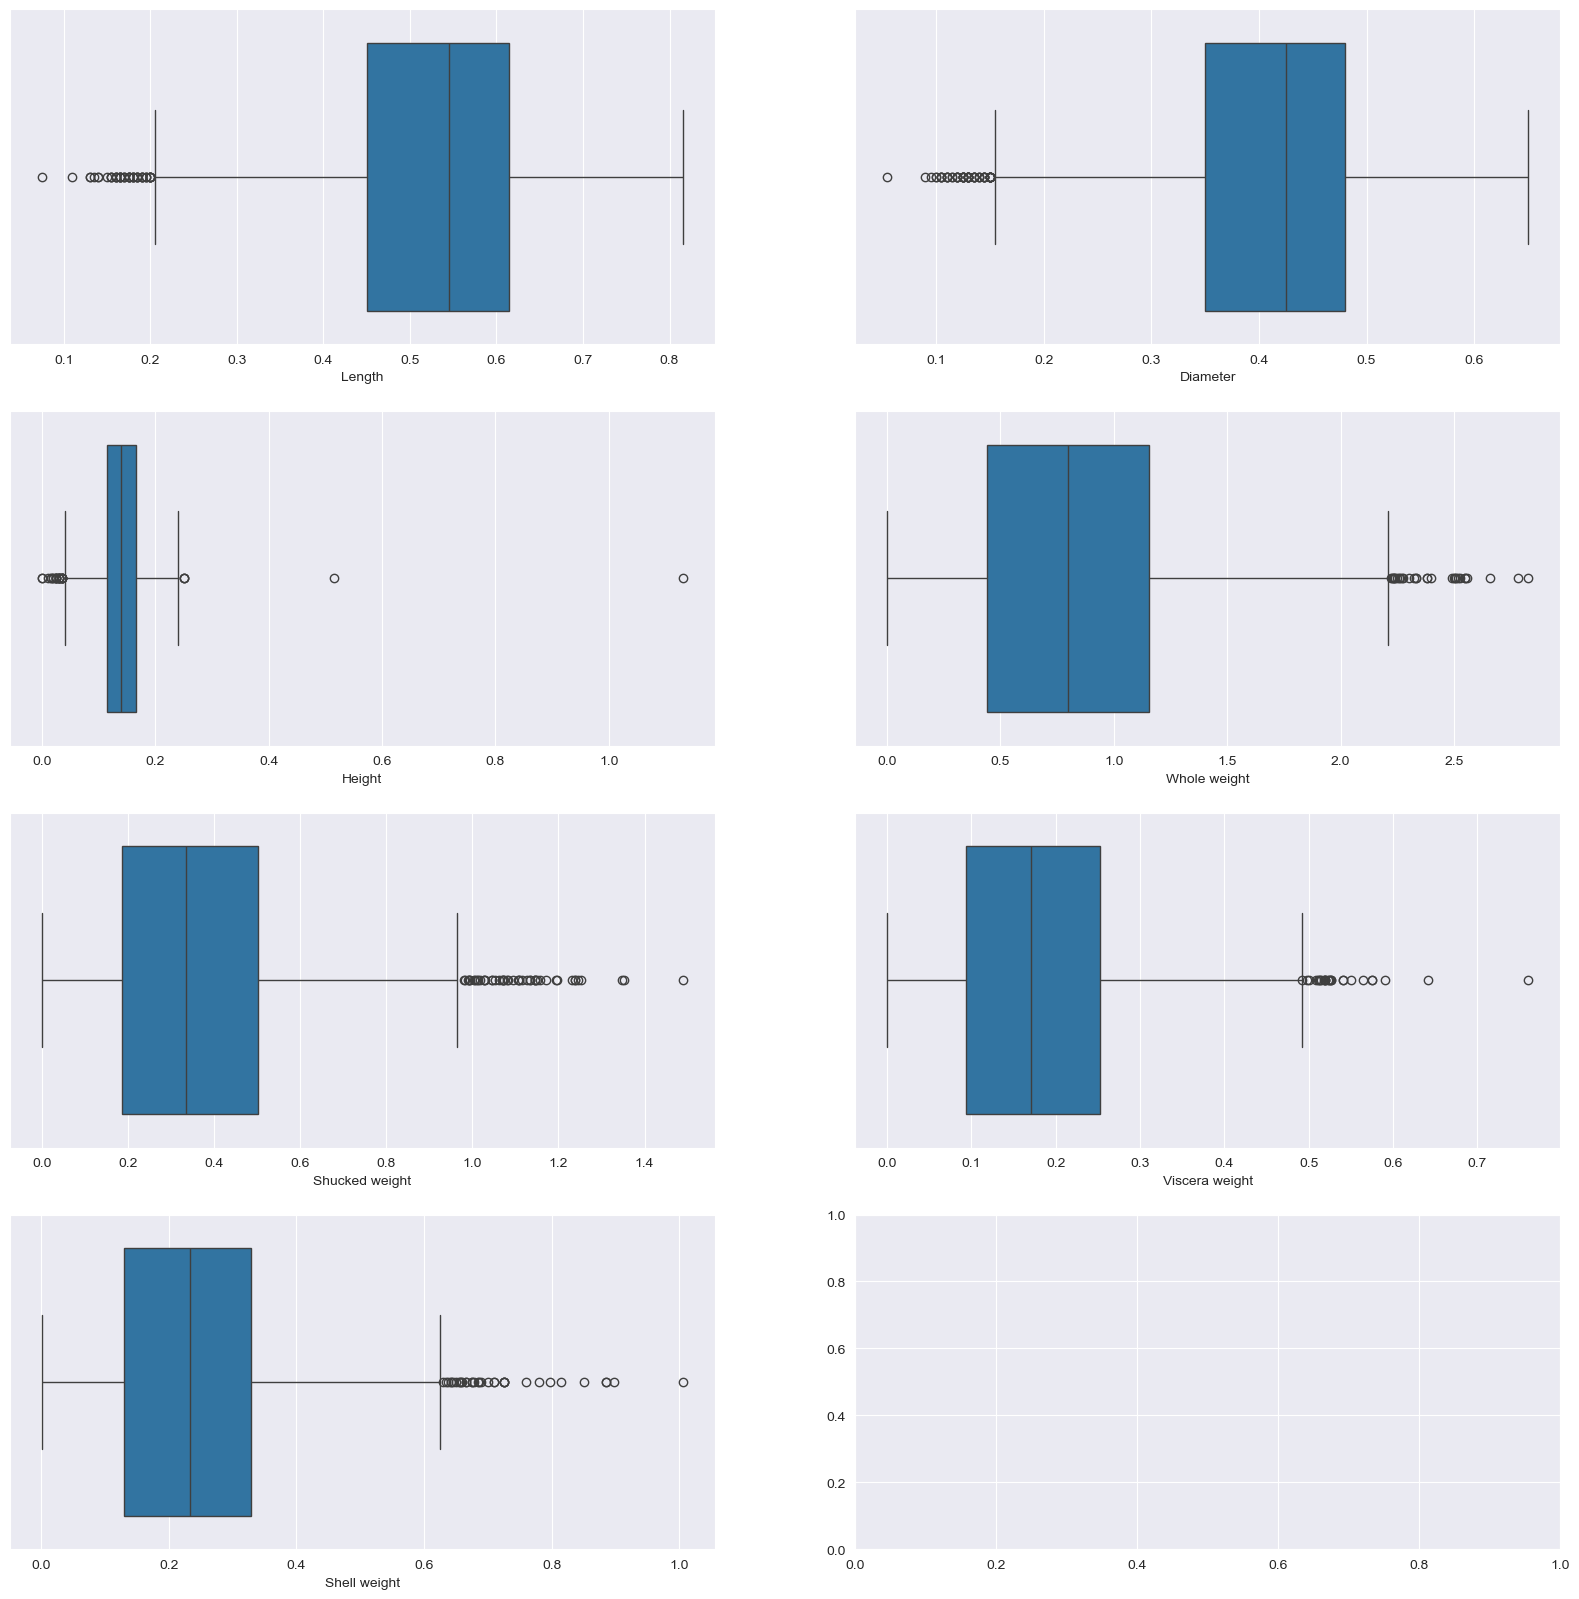

In [14]:
f, ax = plt.subplots(4, 2, figsize=(20, 20))

i = j = 0
for column in num_features:
    if j == 2:
        j = 0
        i += 1

    sns.boxplot(raw_data, x=column, ax=ax[i, j])

    j += 1

### Распределение таргета

<Axes: xlabel='Rings', ylabel='count'>

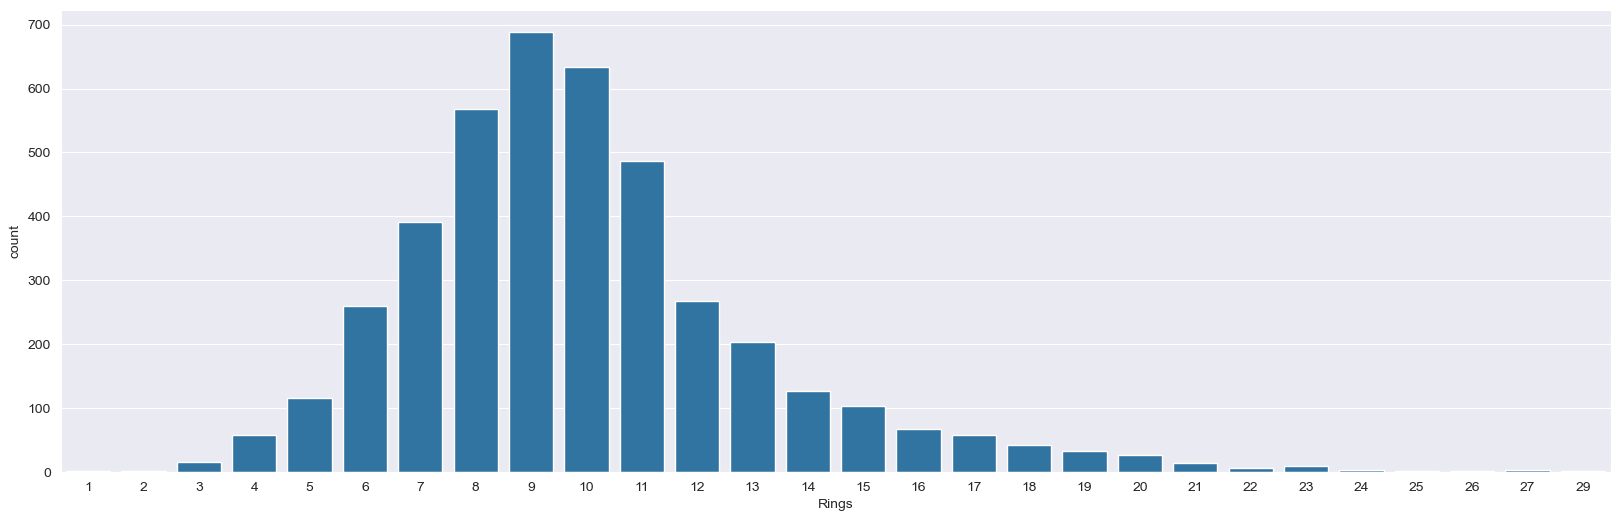

In [15]:
sns.countplot(raw_data, x='Rings')

### Heatmap

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x14f9596c0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

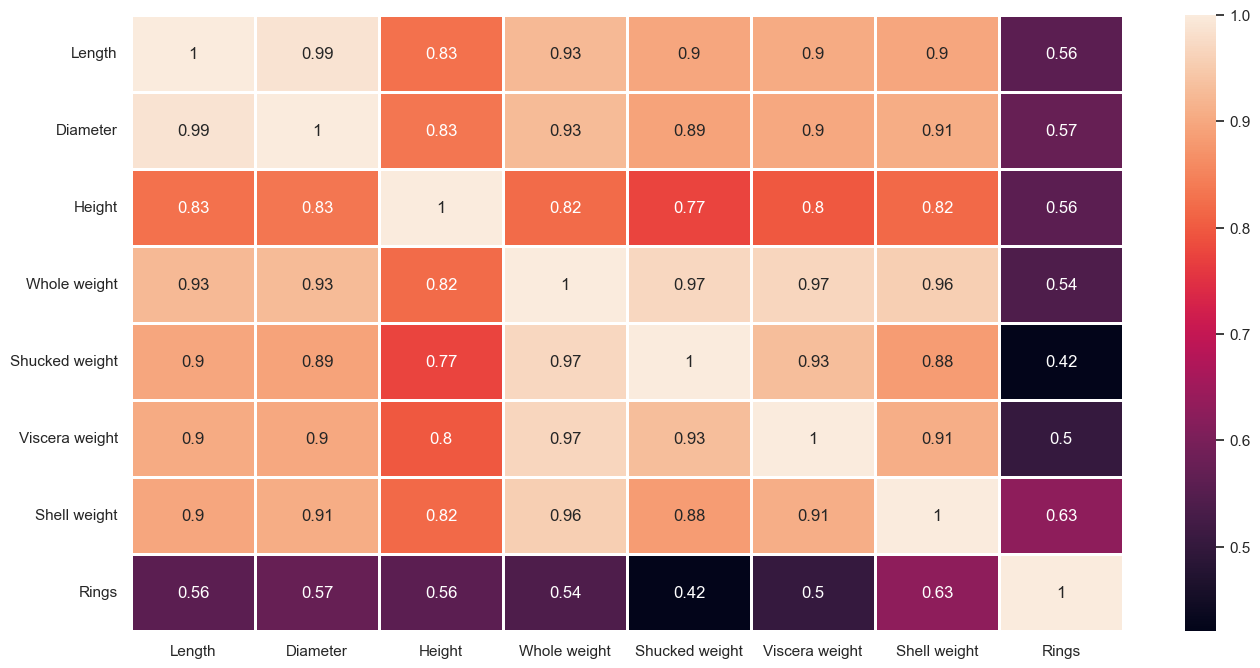

In [16]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(raw_data.drop(['Sex'],axis=1).corr(), annot=True, linewidths=2, cbar=True)

### Pairplot

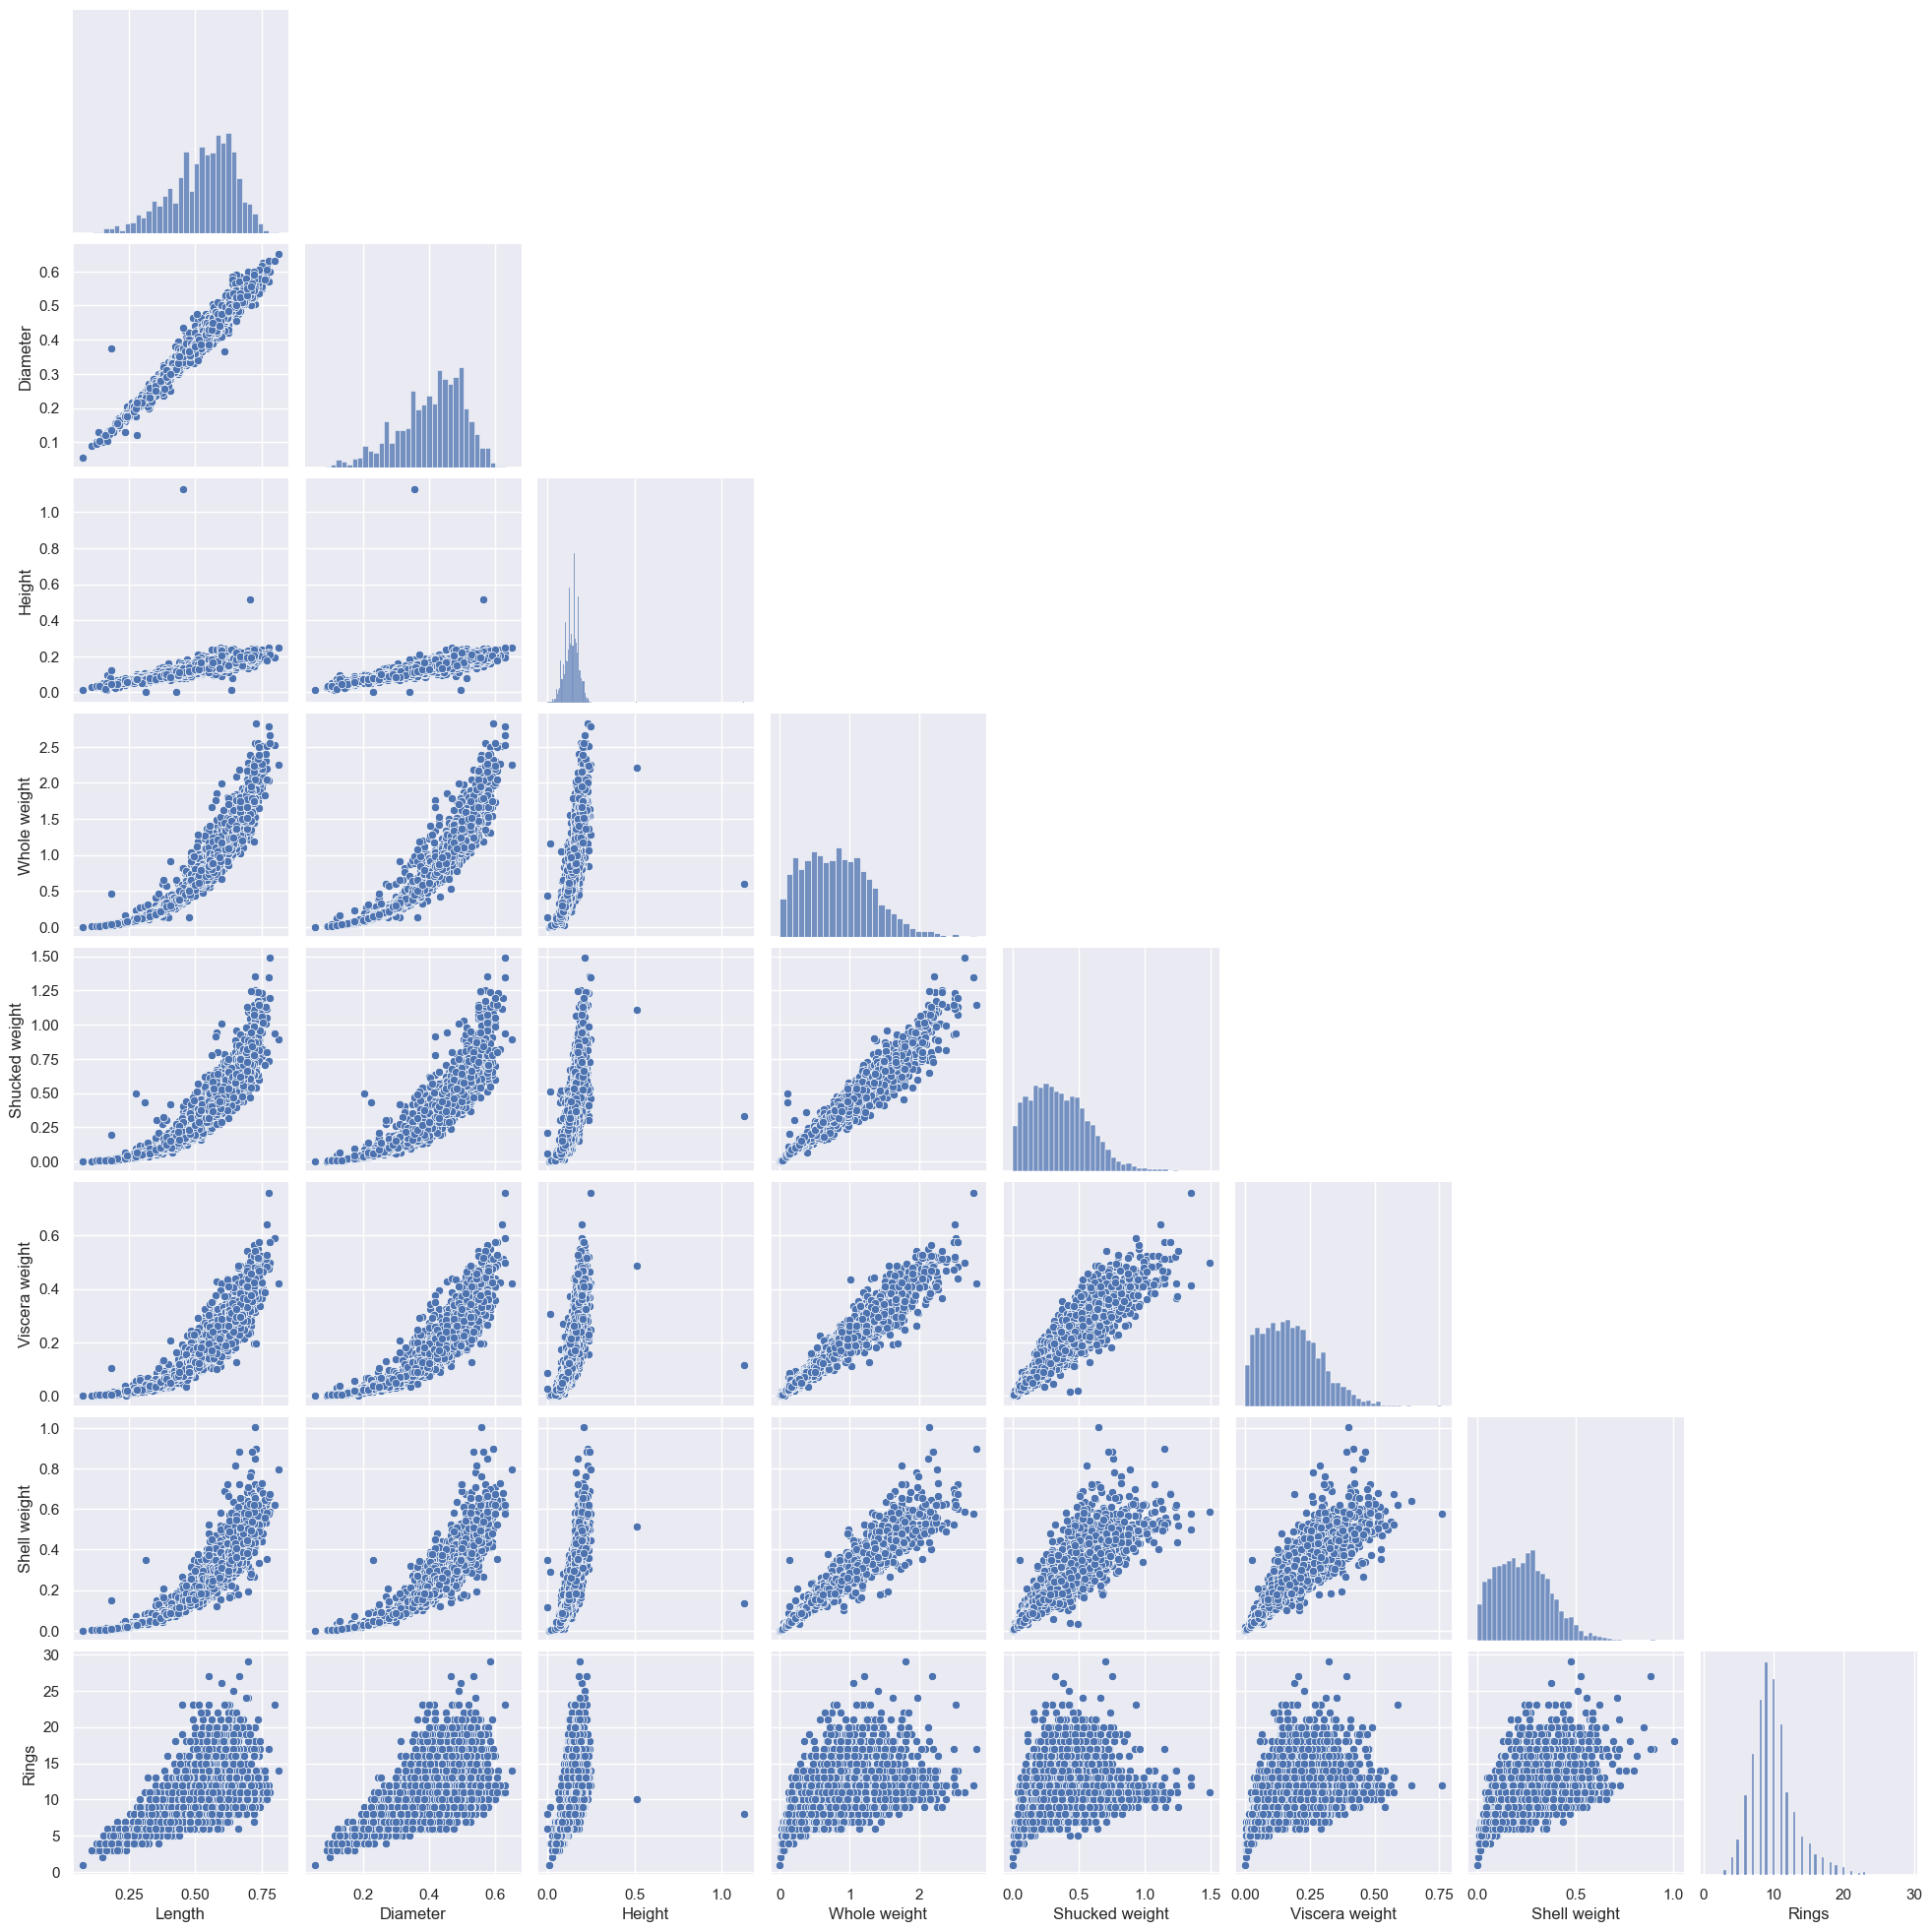

In [17]:
sns.pairplot(raw_data,
             corner=True)

In [19]:
sex_mapping = {'M': 0, 'F': 1, 'I': 2}

In [20]:
raw_data['Sex'] = raw_data['Sex'].map(sex_mapping)

In [23]:
raw_data.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
303,0,0.360,0.270,0.10,0.2170,0.0885,0.0495,0.0715,6
1,0,0.350,0.265,0.09,0.2255,0.0995,0.0485,0.0700,7
3947,0,0.475,0.365,0.14,0.6175,0.2020,0.1445,0.1900,16
584,1,0.410,0.305,0.10,0.3630,0.1735,0.0650,0.1100,11
2789,1,0.620,0.465,0.14,1.1605,0.6005,0.2195,0.3070,9
